In [ ]:
!pip install keras_tuner

In [ ]:
import warnings
import tensorflow
import tensorflow.keras
import sklearn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import  keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


In [ ]:

p=sns.load_dataset('penguins')
p.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
p.shape

(344, 7)

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
p.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
p.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
p.bill_length_mm.fillna(p.bill_length_mm.mean(), inplace=True)
p.bill_depth_mm.fillna(p.bill_depth_mm.mean(), inplace=True)
p.flipper_length_mm.fillna(p.flipper_length_mm.mean(), inplace=True)
p.body_mass_g.fillna(p.body_mass_g.mean(), inplace=True)

In [ ]:
p.sex.fillna(p.sex.mode()[0], inplace=True)

In [ ]:
p.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
p.sample(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female


In [ ]:
p.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
p.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
p.sex.value_counts()

Male      179
Female    165
Name: sex, dtype: int64

In [ ]:
X=p.drop('species', axis=1)
Y=p[['species']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, stratify=Y)

In [ ]:
x_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
320,Biscoe,48.5,15.0,219.0,4850.0,Female
196,Dream,50.9,17.9,196.0,3675.0,Female
95,Dream,40.8,18.9,208.0,4300.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female
240,Biscoe,50.2,14.3,218.0,5700.0,Male


In [ ]:
x_train_new=pd.get_dummies(data=x_train, columns=['island','sex' ], drop_first=True)

In [ ]:
x_test_new=pd.get_dummies(data=x_test, columns=['island','sex' ], drop_first=True)

In [ ]:
x_train_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
320,48.5,15.0,219.0,4850.0,0,0,0
196,50.9,17.9,196.0,3675.0,1,0,0
95,40.8,18.9,208.0,4300.0,1,0,1
342,45.2,14.8,212.0,5200.0,0,0,0
240,50.2,14.3,218.0,5700.0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
sc=StandardScaler()
x_train_1=pd.DataFrame(sc.fit_transform(x_train_new), columns=x_train_new.columns)
x_test_1=pd.DataFrame(sc.transform(x_test_new), columns=x_train_new.columns)

In [ ]:
from tensorflow.keras.metrics import Recall, Precision

In [ ]:
print(y_test.shape)
print(x_test.shape)

(86,)
(86, 6)


In [ ]:
from tensorflow.keras.metrics import Recall


In [ ]:
modelx=Sequential()
modelx.add(Dense(units=128, activation='relu', input_dim=7))
modelx.add(Dense(units=64, activation='relu'))
modelx.add(Dense(units=32, activation='relu'))
modelx.add(Dense(units=16, activation='softmax'))
modelx.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
er=EarlyStopping(monitor='val_loss', min_delta=0.5, patience=5)

In [ ]:
x_test_new.head(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
130,38.5,17.9,190.0,3325.0,0,1,0


In [ ]:
history=modelx.fit(x_train_1.values, y_train, epochs=100, validation_data=(x_test_1.values, y_test), callbacks=[er])

Epoch 1/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000


Text(0.5, 0, 'epoch')

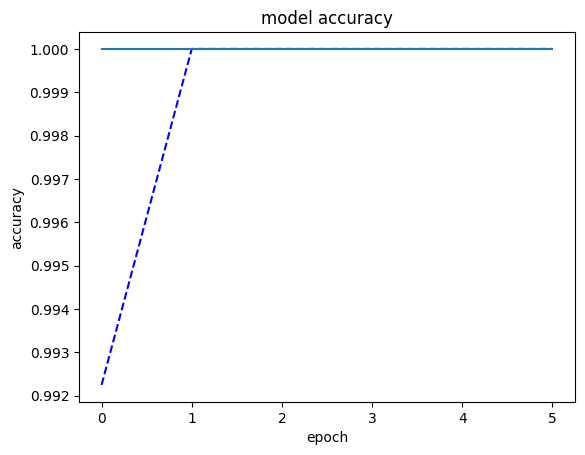

In [ ]:
plt.plot(history.history['accuracy'], 'b--')
plt.plot(history.history['val_accuracy'], '-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_train = model.predict(x_train_1)
y_pred_train = np.argmax(y_pred_train, axis=1)

9/9 [==============================] - 0s 4ms/step


In [ ]:
y_pred_test = model.predict(x_test_1)
y_pred_test = np.argmax(y_pred_test, axis=1)

3/3 [==============================] - 0s 5ms/step


In [ ]:
confusion_matrix(y_train, y_pred_train)

array([[16,  1,  0, 20, 76,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  3],
       [ 0,  0,  0,  0, 36,  0, 57],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [ ]:
from sklearn.metrics import recall_score, precision_score, classification_report

In [ ]:
recall_score(y_train, y_pred_train, average='macro')

0.020050125313283207

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25       114
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

    accuracy                           0.06       258
   macro avg       0.14      0.02      0.04       258
weighted avg       0.44      0.06      0.11       258



In [ ]:
d=pd.concat([x_train_1, pd.DataFrame(y_train)], axis=1)

In [ ]:
np.unique(y_train)

array([0, 1, 2])

In [ ]:
d[0]=le.inverse_transform(y_train)

In [ ]:
d.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,0
0,0.898949,-1.053258,1.318425,0.837591,-0.769800,-0.409171,-0.977008,Gentoo
1,1.352534,0.424836,-0.319639,-0.617319,1.299038,-0.409171,-0.977008,Chinstrap
2,-0.556302,0.934524,0.535003,0.156569,1.299038,-0.409171,1.023533,Adelie
3,0.275270,-1.155195,0.819883,1.270968,-0.769800,-0.409171,-0.977008,Gentoo
4,1.220239,-1.410039,1.247204,1.890079,-0.769800,-0.409171,1.023533,Gentoo


In [ ]:
x_train_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,0.898949,-1.053258,1.318425,0.837591,-0.769800,-0.409171,-0.977008
1,1.352534,0.424836,-0.319639,-0.617319,1.299038,-0.409171,-0.977008
2,-0.556302,0.934524,0.535003,0.156569,1.299038,-0.409171,1.023533
3,0.275270,-1.155195,0.819883,1.270968,-0.769800,-0.409171,-0.977008
4,1.220239,-1.410039,1.247204,1.890079,-0.769800,-0.409171,1.023533


In [ ]:
data=np.array([0.89, -1.05, 1.3, 0.8,-.76, -.04, -.0977]).reshape(1,-1)

In [ ]:

warnings.filterwarnings('ignore')
a=modelx.predict(data).argmax(axis=1)
le.inverse_transform([a])[0]

1/1 [==============================] - 0s 19ms/step


'Gentoo'

In [ ]:
x_train_1.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,0.898949,-1.053258,1.318425,0.837591,-0.769800,-0.409171,-0.977008
1,1.352534,0.424836,-0.319639,-0.617319,1.299038,-0.409171,-0.977008
2,-0.556302,0.934524,0.535003,0.156569,1.299038,-0.409171,1.023533
3,0.275270,-1.155195,0.819883,1.270968,-0.769800,-0.409171,-0.977008
4,1.220239,-1.410039,1.247204,1.890079,-0.769800,-0.409171,1.023533


In [ ]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [ ]:
data=[]
bill_length_mm=float(input("What is the bill_length_mm?"))
data.append(bill_length_mm)
bill_depth_mm=float(input("What is the bill_depth_mm?"))
data.append(bill_depth_mm)
flipper_length_mm=float(input("What is the flipper_length_mm?"))
data.append(flipper_length_mm)
body_mass_g=float(input("What is the body_mass ?"))
data.append(body_mass_g)
island=input("Is it from Dream?")
if island=='yes':
    island=1
else:
    island=0
island_Torgersen=input("Is it from Torgersen?")
if island_Torgersen=='yes':
    island_Torgersen=1
else:
    island_Torgersen=0

data.append(island)
data.append(island_Torgersen)
sex=input("What is the sex? ")
data.append(sex)


data=np.array([data])
data=pd.DataFrame(data, columns=["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g",	"island_Dream",	"island_Torgersen",	"sex_male"])
data=pd.get_dummies(data=data, columns=['sex_male'])
d=sc.transform(data.values)


def predication_of_peinguin():
    data=[]
    bill_length_mm=float(input("What is the bill_length_mm?"))
    data.append(bill_length_mm)
    bill_depth_mm=float(input("What is the bill_depth_mm?"))
    data.append(bill_depth_mm)
    flipper_length_mm=float(input("What is the flipper_length_mm?"))
    data.append(flipper_length_mm)
    body_mass_g=float(input("What is the body_mass ?"))
    data.append(body_mass_g)
    island=input("Is it from Dream?")
    if island=='yes':
        island=1
    else:
        island=0
    island_Torgersen=input("Is it from Torgersen?")
    if island_Torgersen=='yes':
        island_Torgersen=1
    else:
        island_Torgersen=0

    data.append(island)
    data.append(island_Torgersen)
    sex=input("What is the sex? ")
    data.append(sex)


    data=np.array([data])
    data=pd.DataFrame(data, columns=["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g",	"island_Dream",	"island_Torgersen",	"sex_male"])
    data=pd.get_dummies(data=data, columns=['sex_male'])
    d=sc.transform(data.values)




    a=modelx.predict(d).argmax(axis=1)
    return f"The Species of the Peinguin is {le.inverse_transform([a])[0]}"


predication_of_peinguin()




In [ ]:

predication_of_peinguin([0.89, -1.05, 1.3, 0.8,-.76, -.04, -.0977])

1/1 [==============================] - 0s 19ms/step


'Gentoo'

In [ ]:
def predication_of_peinguin():
    data=[]
    bill_length_mm=float(input("What is the bill_length_mm?"))
    data.append(bill_length_mm)
    bill_depth_mm=float(input("What is the bill_depth_mm?"))
    data.append(bill_depth_mm)
    flipper_length_mm=float(input("What is the flipper_length_mm?"))
    data.append(flipper_length_mm)
    body_mass_g=float(input("What is the body_mass ?"))
    data.append(body_mass_g)
    island=input("Is it from Dream?")
    if island=='yes':
        island=1
    else:
        island=0
    island_Torgersen=input("Is it from Torgersen?")
    if island_Torgersen=='yes':
        island_Torgersen=1
    else:
        island_Torgersen=0

    data.append(island)
    data.append(island_Torgersen)
    sex=input("What is the sex? ")
    data.append(sex)


    data=np.array([data])
    data=pd.DataFrame(data, columns=["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g",	"island_Dream",	"island_Torgersen",	"sex_male"])
    data=pd.get_dummies(data=data, columns=['sex_male'])
    d=sc.transform(data.values)




    a=modelx.predict(d).argmax(axis=1)
    return f"The Species of the Peinguin is {le.inverse_transform([a])[0]}"



In [1]:
predication_of_peinguin()

NameError: name 'predication_of_peinguin' is not defined

In [ ]:
sc.transform(np.array([[1,2,3,4,5,6,7]]))

array([[ -8.07825285,  -7.67919601, -14.06513027,  -5.16282904,
          9.57439196,  16.70965432,  13.02677895]])